# <b> <center style="background-color:DodgerBlue;"> Financial Sentiment Analysis </center> </b>


#### -*- coding: utf-8 -*-
#### Indentation: Jupyter Notebook

__version__='1.0.0'
__author__="Sourav Raj, Nitin Agarwal, Anusha linda kostka j e"
__email__="2020sc04304@wilp.bits-pilani.ac.in; 2020sc04557@wilp.bits-pilani.ac.in; 2020sc04900@wilp.bits-pilani.ac.in"

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random
import warnings
warnings.filterwarnings('ignore')
import logging

import string
import re
import nltk
from nltk.tokenize import word_tokenize
# Lemmatization
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud,STOPWORDS

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

import gensim
from gensim.models import Word2Vec
import gensim.downloader

import spacy
from spacy import displacy

In [17]:
random.seed(42)         # Initialize the random number generator.
np.random.seed(42)      # With the seed reset, the same set of 
                        # numbers will appear every time. 


### Import data

In [169]:
fsa = pd.read_csv(r'../data/Financial Sentiment Analysis.csv')
print(fsa.shape)
fsa.head(2)

(5842, 2)


,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative


### Data Exploration

In [170]:
fsa.describe()

,Sentence,Sentiment
count,5842,5842
unique,5322,3
top,Finnish glass technology company Glaston Oyj A...,neutral
freq,2,3130


In [35]:
fsa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5842 entries, 0 to 5841
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Sentence   5842 non-null   object
 1   Sentiment  5842 non-null   object
dtypes: object(2)
memory usage: 91.4+ KB


In [36]:
fsa.isnull().sum()
#No data Missing

Sentence     0
Sentiment    0
dtype: int64

In [37]:
fsa['Sentiment'].unique()
# 3 Labels for Classification

array(['positive', 'negative', 'neutral'], dtype=object)

In [38]:
#checking counts for each label
fsa['Sentiment'].value_counts()
#Maximum is 5 Min is 1

neutral     3130
positive    1852
negative     860
Name: Sentiment, dtype: int64

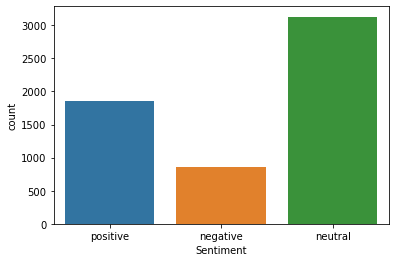

In [39]:
#Plotting Class labels on a Graph
# sns.set_theme(style="darkgrid")
ax = sns.countplot(x="Sentiment", data=fsa)

Observation: There is class imbalance 

## Data Preprocessing

#### Removing Punctuations

In [40]:
def remove_punct(text):
    text_nopunct=''.join([char for char in text if char not in string.punctuation])
    return text_nopunct

fsa['cleaned_sentence']=fsa['Sentence'].apply(lambda x: remove_punct(x))
fsa.head()

,Sentence,Sentiment,cleaned_sentence
0,The GeoSolutions technology will leverage Bene...,positive,The GeoSolutions technology will leverage Bene...
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative,ESI on lows down 150 to 250 BK a real possibility
2,"For the last quarter of 2010 , Componenta 's n...",positive,For the last quarter of 2010 Componenta s net...
3,According to the Finnish-Russian Chamber of Co...,neutral,According to the FinnishRussian Chamber of Com...
4,The Swedish buyout firm has sold its remaining...,neutral,The Swedish buyout firm has sold its remaining...


#### Removing Numbers, and Special Characters

In [41]:
def remove_number_special_character(text):
    return re.sub("[^A-Za-z\s]",'',text)
fsa['cleaned_sentence']=fsa['cleaned_sentence'].apply(lambda x: remove_number_special_character(x))
fsa.head()

,Sentence,Sentiment,cleaned_sentence
0,The GeoSolutions technology will leverage Bene...,positive,The GeoSolutions technology will leverage Bene...
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative,ESI on lows down to BK a real possibility
2,"For the last quarter of 2010 , Componenta 's n...",positive,For the last quarter of Componenta s net sal...
3,According to the Finnish-Russian Chamber of Co...,neutral,According to the FinnishRussian Chamber of Com...
4,The Swedish buyout firm has sold its remaining...,neutral,The Swedish buyout firm has sold its remaining...


#### Removing Stop Words

In [42]:
stopword=nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    tokenized_list=word_tokenize(text)
    text=' '.join([word for word in tokenized_list if str.lower(word) not in stopword])
    return text
fsa['cleaned_sentence']=fsa['cleaned_sentence'].apply(lambda x: remove_stopwords(x))
fsa.head()

,Sentence,Sentiment,cleaned_sentence
0,The GeoSolutions technology will leverage Bene...,positive,GeoSolutions technology leverage Benefon GPS s...
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative,ESI lows BK real possibility
2,"For the last quarter of 2010 , Componenta 's n...",positive,last quarter Componenta net sales doubled EURm...
3,According to the Finnish-Russian Chamber of Co...,neutral,According FinnishRussian Chamber Commerce majo...
4,The Swedish buyout firm has sold its remaining...,neutral,Swedish buyout firm sold remaining percent sta...


#### converting to lower case

In [43]:
fsa['cleaned_sentence']=fsa['cleaned_sentence'].str.lower()

#### Normalize Sentence column by using Stemming or Lemmatization

In [44]:
wordnet_lemmatizer = WordNetLemmatizer()

def lemmatizing_apply(text):
    tokenized_text=word_tokenize(text)
    text = ' '.join([wordnet_lemmatizer.lemmatize(word) for word in tokenized_text])
    return text

fsa['cleaned_sentence']=fsa['cleaned_sentence'].apply(lambda x: lemmatizing_apply(x))
fsa.head()

,Sentence,Sentiment,cleaned_sentence
0,The GeoSolutions technology will leverage Bene...,positive,geosolutions technology leverage benefon gps s...
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative,esi low bk real possibility
2,"For the last quarter of 2010 , Componenta 's n...",positive,last quarter componenta net sale doubled eurm ...
3,According to the Finnish-Russian Chamber of Co...,neutral,according finnishrussian chamber commerce majo...
4,The Swedish buyout firm has sold its remaining...,neutral,swedish buyout firm sold remaining percent sta...


#### Word Cloud 

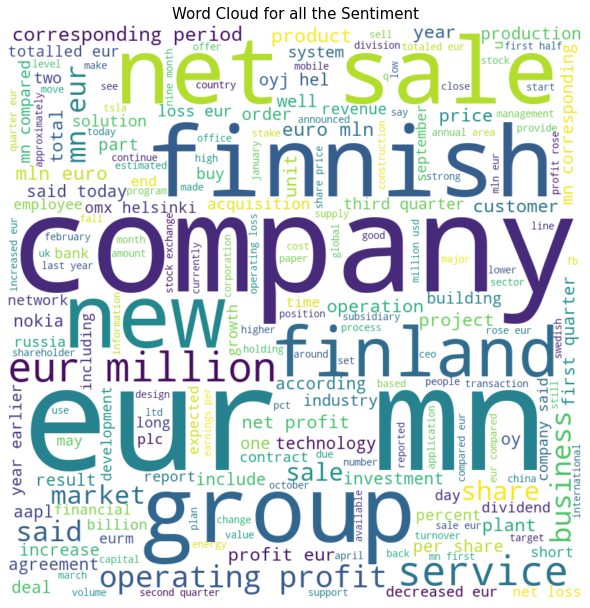

In [164]:
wordcloud = WordCloud(width = 800, height = 800, background_color ='white', min_font_size = 12).generate(" ".join(fsa['cleaned_sentence'].values))                      
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud, interpolation='bilinear') 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.title("Word Cloud for all the Sentiment",fontsize=15)
plt.show()

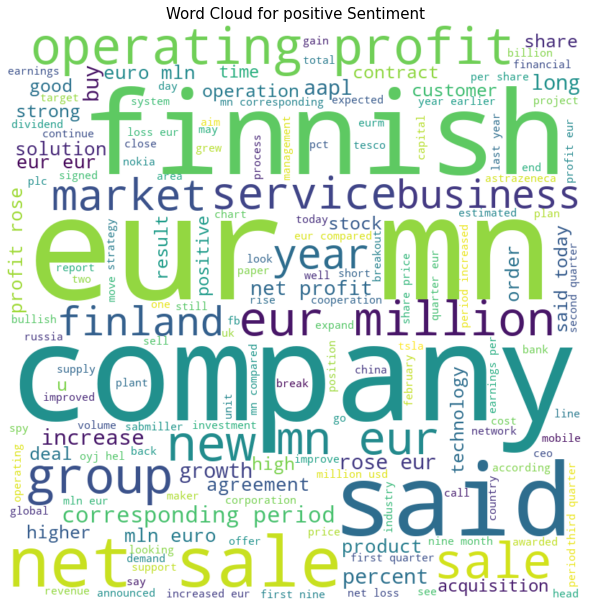

In [165]:
wordcloud = WordCloud(width = 800, height = 800, background_color ='white', min_font_size = 12).generate(" ".join(fsa[fsa["Sentiment"]=='positive']['cleaned_sentence'].values))                      
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud, interpolation='bilinear') 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.title("Word Cloud for positive Sentiment",fontsize=15)
plt.show()

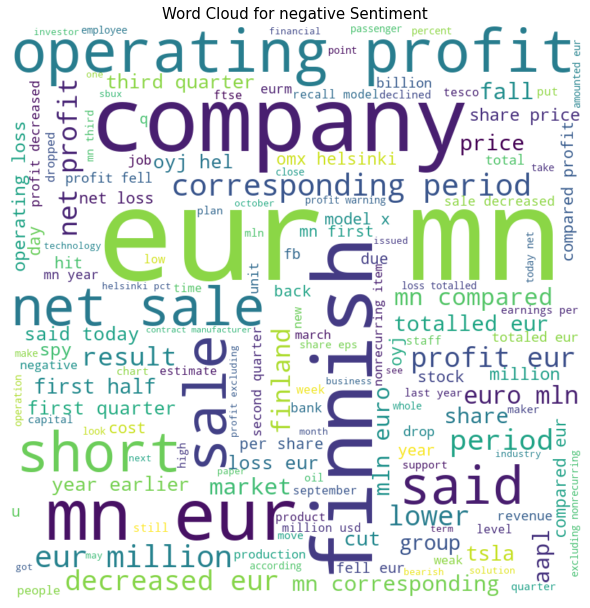

In [166]:
wordcloud = WordCloud(width = 800, height = 800, background_color ='white', min_font_size = 12).generate(" ".join(fsa[fsa["Sentiment"]=='negative']['cleaned_sentence'].values))                      
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud, interpolation='bilinear') 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.title("Word Cloud for negative Sentiment",fontsize=15)
plt.show()

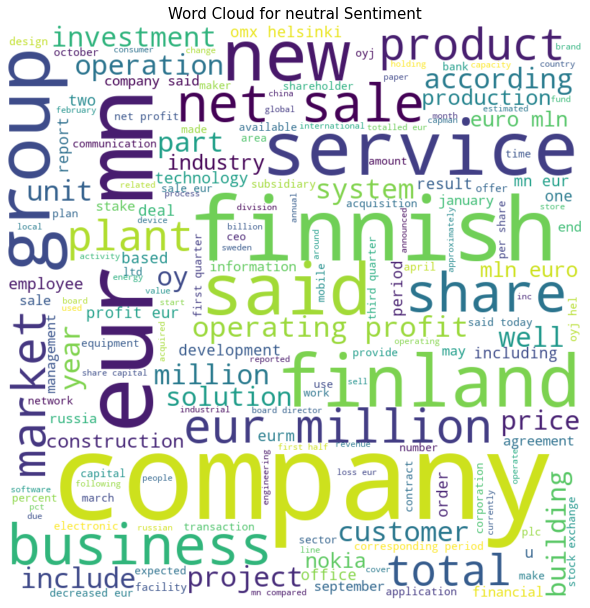

In [167]:
wordcloud = WordCloud(width = 800, height = 800, background_color ='white', min_font_size = 12).generate(" ".join(fsa[fsa["Sentiment"]=='neutral']['cleaned_sentence'].values))                      
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud, interpolation='bilinear') 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.title("Word Cloud for neutral Sentiment",fontsize=15)
plt.show()

In [144]:
fsa["Sentiment"].unique()

array(['positive', 'negative', 'neutral'], dtype=object)

In [46]:
labelencoder = LabelEncoder()
fsa["Sentiment_Label"]=labelencoder.fit_transform(fsa["Sentiment"])

In [48]:
X, y = fsa['cleaned_sentence'], fsa['Sentiment_Label']

In [49]:
#tokenise all the words from the corpus and store it to fed to wordtovec model
X_tokenize = [word_tokenize(sentence) for sentence in X]
print(len(X_tokenize))
print(X_tokenize[1])

5842
['esi', 'low', 'bk', 'real', 'possibility']


### Model Creation & Building

#### Model Iteration #1 - word2vec

here we training the word2vec model for the given corpus

In [140]:
w2v=Word2Vec(vector_size=300,   
            window=10, min_count=1, sg=1, epochs=40)
w2v.build_vocab(X_tokenize)
w2v.train(X_tokenize, total_examples=w2v.corpus_count, epochs=w2v.epochs)

(2391869, 2626000)

In [141]:
print(len(w2v.wv['technology']))
w2v.wv['technology']

300


array([-0.01267904,  0.9410659 , -0.17314221,  0.2659793 ,  0.4460735 ,
       -0.18908095,  0.03808388,  0.588951  , -0.12077028,  0.24539772,
       -0.10999433, -0.0954669 , -0.27698964,  0.22181806, -0.09645312,
        0.32833672, -0.911386  , -0.0431389 ,  0.23386018,  0.257296  ,
       -0.36758283, -0.10284159,  0.24333973,  0.19663736,  0.36678228,
       -0.47840178, -0.49573767, -0.09526293, -0.81140584, -0.14090167,
        0.7772858 , -0.3871209 , -0.05778633,  0.19482595,  0.3408682 ,
        0.13061541, -0.20206603, -0.28503683,  0.09121813, -0.14258334,
       -0.8738098 , -0.06020976,  0.6186932 ,  0.29270566,  0.42327404,
        0.24426883,  0.3025124 ,  0.2848279 ,  0.1688047 ,  0.15773271,
        0.05624943,  0.05680458,  0.4533526 ,  0.28112587, -0.0295737 ,
        0.18271686,  0.2996477 , -0.04316458,  0.06933766, -0.34046283,
       -0.14067717, -0.0464315 , -0.5484018 , -0.48864543,  0.425474  ,
       -0.7230385 , -0.02415998,  0.90750355,  0.25473174,  0.42

In [150]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
X_tokenize_pca = pca.fit_transform(w2v.wv.get_normed_vectors())
print(X_tokenize_pca.shape)
import plotly.express as px
fig = px.scatter_3d(X_tokenize_pca[200:300],x=0,y=1,z=2, color=y[200:300])
fig.show()

(9787, 3)


for each word we are getting 300 features, now to get the feature value of each corpus. we will can take sum, max or avg values, in this we are taking mean value.
We can also apply doc2vec method to get the score directly.

In [142]:
def sentence_feature_averaging(wv, sentence):
    all_words, mean = set(), []
    
    for word in sentence:
        if isinstance(word, np.ndarray):
            mean.append(word)
        elif wv.key_to_index[word]:
            mean.append(wv[word])
            all_words.add(wv.key_to_index[word])

    if not mean:
        logging.warning(f"not able to compute word2vec for {sentence}")
        # FIXME: remove these examples in pre-processing
        return np.zeros(wv.vector_size,)

    mean = gensim.matutils.unitvec(np.array(mean).mean(axis=0)).astype(np.float32)
    return mean


def corpus_feature_averaging_list(wv, sentence_corpus):
    return np.vstack([sentence_feature_averaging(wv, sentence) for sentence in sentence_corpus ])

In [143]:
X_tokenize_w2v_features=corpus_feature_averaging_list(w2v.wv, X_tokenize)
len(X_tokenize_w2v_features[0])

300

###### MultinomialNB model

In [160]:
X_train, X_test, y_train, y_test = train_test_split(X_tokenize_w2v_features, y, test_size=0.2, random_state=5, stratify=y)

# as some feature value of word2vec are coming negative so we are normalizing this to (0,1) so that MultinomialNB can work as it \
# positive numbers as input

sc = MinMaxScaler()
X_train_norm = sc.fit_transform(X_train)
X_test_norm = sc.transform(X_test)
model = MultinomialNB()

model.fit(X_train_norm, y_train)

y_pred = model.predict(X_test_norm)

accuracy = accuracy_score(y_test, y_pred)

print('accuracy:', accuracy)

print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))

print('Confusion Matrix:\n ', classification_report(y_test, y_pred))

accuracy: 0.6253207869974337
Confusion Matrix: 
 [[  0 107  65]
 [  0 603  23]
 [  1 242 128]]
Confusion Matrix:
                precision    recall  f1-score   support

           0       0.00      0.00      0.00       172
           1       0.63      0.96      0.76       626
           2       0.59      0.35      0.44       371

    accuracy                           0.63      1169
   macro avg       0.41      0.44      0.40      1169
weighted avg       0.53      0.63      0.55      1169



#### Model Iteration #2 - CBOW

here we training the CBOW model for the given corpus

In [154]:
wv_CBOW=Word2Vec(vector_size=100,   
            window=10, min_count=1, sg=0, epochs=40)
wv_CBOW.build_vocab(X_tokenize)
wv_CBOW.train(X_tokenize, total_examples=wv_CBOW.corpus_count, epochs=wv_CBOW.epochs)

(2392180, 2626000)

In [155]:

X_tokenize_CBOW_features=corpus_feature_averaging_list(wv_CBOW.wv, X_tokenize)

In [156]:
len(X_tokenize_CBOW_features[0])

100

###### MultinomialNB model

In [159]:
X_train, X_test, y_train, y_test = train_test_split(X_tokenize_CBOW_features, y, test_size=0.2, random_state=5, stratify=y)
sc = MinMaxScaler()
X_train_norm = sc.fit_transform(X_train)
X_test_norm = sc.transform(X_test)
model = MultinomialNB()

model.fit(X_train_norm, y_train)

y_pred = model.predict(X_test_norm)

accuracy = accuracy_score(y_test, y_pred)

print('accuracy:', accuracy)

print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))

print('Confusion Matrix:\n ', classification_report(y_test, y_pred))

accuracy: 0.6159110350727117
Confusion Matrix: 
 [[  0 107  65]
 [  0 592  34]
 [  1 242 128]]
Confusion Matrix:
                precision    recall  f1-score   support

           0       0.00      0.00      0.00       172
           1       0.63      0.95      0.76       626
           2       0.56      0.35      0.43       371

    accuracy                           0.62      1169
   macro avg       0.40      0.43      0.39      1169
weighted avg       0.52      0.62      0.54      1169



#### Justification/Observation:

We have trained both the models from given corpus and based on the above we are getting better results for word2Vec (with Skip Gram) than CBOW which makes sense & aligned with theoretical result. CBOW is trained to predict a single word from a fixed window size of context words & learn better syntactic relationships, whereas Skip-gram does the opposite, and tries to predict several context words  with capturing better semantic relationships from a single input word. 

Skip-gram rely on single words input, it is less sensitive to overfit frequent words, because even if frequent words are presented more times than rare words during training, they still appear individually, while CBOW is prone to overfit frequent words because they appear several time along with the same context. 

Also when data set is small word2vec (with Skip-gram) performance is better. As we have less data in training word2vec definitely performs better. 

Another thing we noticed is that the data is not balanced & there are a very few samples for the negative sentiment. so the model is not able to distinguish it from other classes. 

Also as the dataset has very limited number of words in corpus, the embedding technique is not capturing enough features. We can improve its accuracy by hyperparameter tuning of word2vec parameter.

We also tried the pretrained model like glove-twitter-100, glove-twitter-25 but even their performance is not good, as some of the words are not matching with the pretrained word of corpus. This area can be further explored, when given more time & resource to increase the overall accuracy of the model.


#### Dependency Parser Tree

In [66]:
sentence='The name of the buyer was not disclosed'
nlp = spacy.load("en_core_web_sm")
doc = nlp(sentence)

print (f"{'Token':<10} | {'Relation':<10} | {'Head':<10} | {'Children':<20}")
print ("-" * 70)
for token in doc:
  # Print the token, dependency nature, head and all dependents of the token
    print (f"{str(token.text):<10} | {token.dep_:<10} | {token.head.text:<10} | {str([child for child in token.children]):<20}")
  

Token      | Relation   | Head       | Children            
----------------------------------------------------------------------
The        | det        | name       | []                  
name       | nsubjpass  | disclosed  | [The, of]           
of         | prep       | name       | [buyer]             
the        | det        | buyer      | []                  
buyer      | pobj       | of         | [the]               
was        | auxpass    | disclosed  | []                  
not        | neg        | disclosed  | []                  
disclosed  | ROOT       | disclosed  | [name, was, not]    


In [67]:
# Visualizing the dependency 
displacy.render(doc, style='dep', jupyter=True, options={'distance': 120})